# Aula 3.1 - Avaliando modelos

Nós vimos o algoritmo de árvore de decisão nas aulas passadas, 
e sempre reforçamos a quebra em treino, validação e teste. 

Hoje, vamos discutir em mais detalhes o porquê dessa quebra.

- 1) Machine Learning e Generalização
- 2) Ruído
- 3) Métricas de erro
- 4) Overfitting e Underfitting
- 5) Estratégia "Holdout set": Conjuntos de treino, validação e teste

## 1) Machine Learning e Generalização

Nós já discutimos um pouco sobre o que é Aprendizado de Máquina e como esses métodos buscam prever valores previamente desconhecidos.

Além disso, temos visto com frequência que o aprendizado de máquina consiste em buscar __usar dados conhecidos__ para prever __dados desconhecidos__. Isso nos permite ter uma ferramenta extremamente poderosa quando temos que tomar decisões baseadas em regras que não são claras, embora existam.

<div class="alert alert-block alert-info" align="center">
    <font size=4> Explique com exemplos ao invés de instruções. </font><br>
</div>
<div class="alert alert-block alert-info" align="center">
    <font size=4> IA permite automatizar o indescritível. </font><br>
</div>

Porém, algo que não gastamos muito tempo discutindo foi sobre

<div class="alert alert-block alert-warning">
<font size=4> <b>como é possível usar um conjunto de dados para aprender sobre dados fora dele? </b></font>
</div>

<br><br>

Imagine o seguinte problema: <br>
(ref: [Learning from Data](https://work.caltech.edu/telecourse) )

Temos uma urna cheia de bolas coloridas azuis e vermelhas. Essa urna é realmente muito grande, então é impossível contar todas as bolas dentro dela.

Nesse caso, __como podemos ter uma ideia de qual proporção de bolas azuis e qual a proporção de bolas vermelhas temos na urna__?

<div>
    <img src="images/exemplo_urna.png" width=500>
</div>

Nós podemos pegar, aleatoriamente, 10 bolinhas da urna, e ver a proporção dentro das minhas 10 bolinhas. Eu __não tenho como ter certeza__ de qual a proporção no vaso, mas eu consigo __ter uma boa ideia__ (eu consigo __chutar com boa chance de acertar__).

Eu vou tentar usar minha amostra de bolinhas para __generalizar para toda a urna__.

<br><br>

Em aprendizado de máquina, fazemos algo semelhante. A gente tenta __generalizar da base de treino para toda a população__, e obtemos uma aproximação (que esperamos ter uma boa chance de acertar).

__Exemplo:__<br>
Queremos saber preços de apartamentos em Santa Catarina. Nós não temos todos os preços já vendidos, mas temos uma amostra recente. A gente então treina um modelo nessa amostra, e espera que ele aproxime bem o preço para apartamentos fora da nossa amostra.)

## 2) Ruído

Com uma urna imaginária, é fácil ficar pegando ótimas amostras. Nenhum erro, fácil de ver a cor de cada bolinha, e fazer tudo que precisamos.

Mas na vida real, nossos dados não são perfeitos, eles sempre têm uma __incerteza associada__.

- Se você está em um laboratório, qualquer aparelho de medida tem um nível de precisão. A precisão não é infinita!
- Se você trabalha em um banco, às vezes os dados adicionados estavam com pequenos erros. O cliente falou "6", o caixa entendeu "3". Também podemos ter valores arredondados.
- Talvez você trabalhe em empresas como data folha, entrevistando pessoas sobre as eleições. Nesse caso, às vezes pessoas mentem, ou não têm certeza da escolha.

Seja por qual motivo, seus dados __NUNCA__ são perfeitos. Eles __SEMPRE__ vão ter um certo grau de incerteza. Essa incerteza é intrínseca, e tem relação com a forma de obtenção dos dados, não com modelos ou generalizações.
<br><br>
<div>
    <img src="images/incerteza_nos_dados.png" width=600>
</div>

Muitas vezes, essa incerteza intrínseca é chamada de __ruído__. Assim, quando os dados têm pouca precisão (muita incerteza), às vezes a gente fala que os dados estão muito ruidosos. Também é comum dizermos que o padrão que existe nos dados é o __sinal__. 

## 3) Métricas de erro

Nos itens anteriores, a gente viu que é muito difícil a gente fazer previsões de forma "certeira". A gente só consegue fazer previsões __aproximadas__ (regressão), ou que tenham uma __boa chance de acertar__ (classificação).

Mas precisamos de alguma forma avaliar isso, e tentar quantificar o quão bem estamos nos saindo. Assim, todas as métricas que vimos até agora são usadas exatamente com essa finalidade.

## 4) Overfitting e Underfitting

Os nossos modelos podem ter previsões muito fracas, que não são aproximações suficientemente boas para o que precisamos. Nessa situação, dizemos que o modelo sofreu __underfitting__, e precisaremos fazer alguma alteração (ou escolher outros modelos) para melhorar.

<div class="alert alert-block alert-info" align="center">
    <font size=4><b>Underfitting</b></font><br>
    Nesse caso temos um modelo simples demais que não consegue se ajustar aos dados. Dessa forma, ele não apresenta boa performance na base de treino pois é pouco assertivo. 
</div>

O underfitting pode acontecer por causa dos dados (não tem um padrão ou é muito ruidoso), ou porque o nosso modelo é ruim para essa tarefa em específico.

Um problema muito mais comum, contudo, é quando as nossas aproximações dentro da base de treino são ótimas, mas quando vamos testar se conseguimos generalizar fora dessa base, as previsões passam a ser muito ruins. Isso é chamado de __overfitting__.

<div class="alert alert-block alert-info" align="center">
    <font size=4><b>Overfitting</b></font><br>
    Quando o nosso modelo de aprendizado de máquina tem ótima performance na base de treino, mas péssima performance fora dela. Em geral, ele é um modelo muito complexo que não é capaz de generalizar. O modelo ficou "viciado" nos dados em que ele foi treinado e qualquer variação nesses dados faz com que ele erre.
</div>

Quando um modelo sofre de overfitting, isso significa que ele não só aprendeu o sinal que existia nos dados de treino, mas também o ruído.
<br><br>
<div>
    <img src="images/overfitting.svg" width=700>
</div>

Vamos ver um exemplo de overfitting.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Vamos gerar alguns dados artificiais,
# pois assim conseguimos um número grande de pontos sem muitas dificuldades.

# Vamos fazer um problema de regressão
num_pontos = 100000

# Pegando 100.000 pontos aleatoriamente entre -2 e 2
X = np.random.uniform(-2.0, 2.0, size=num_pontos)

# Elevando ao quadrado
y_ori = np.square(X)

# Adicionando um ruído. Ajustamos a escala para não ficar ruidoso demais.
y = y_ori + np.random.normal(scale=0.5, size=num_pontos)

In [3]:
# X tem que ser uma lista de pontos, com dimensão (num_pontos, 1)
# para o modelo do scikit-learn
X = X.reshape(num_pontos,1)

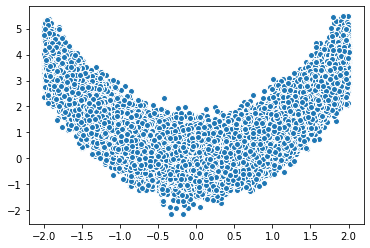

In [4]:
# Vamos olhar a cara dos nossos dados
plt.scatter(X, y, edgecolor='white')
plt.show()

In [5]:
# Separando em treino e teste
from sklearn.model_selection import train_test_split

In [6]:
# Separando em treino e teste
X_in, X_out, y_in, y_out = train_test_split(X,y)

In [7]:
# Vamos ver como um modelo de árvore de decisão se sai 
# dentro da amostra de treino, e fora, para diferentes números de camadas.
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Inicializando vetores de erro
error_in = []
error_out = []

# Vamos escolher um range de camadas para a árvore de decisão
num_camadas = list(range(1,40))

# Para cada escolha de número máximo de camadas de decisão
for depth in num_camadas:
    print(f"Processando max_depth = {depth}")
    
    # Definimos uma árvore de decisão
    model = DecisionTreeRegressor(max_depth = depth)
    
    # Treinamos com a base de treino
    model.fit(X_in, y_in)
    
    # Vamos ver como ficou o resultado no treino e fora dele
    y_pred_in = model.predict(X_in)
    y_pred_out = model.predict(X_out)
    
    # Calculando RMSE, ou seja, o erro de aproximação
    mse_in = mean_squared_error(y_in, y_pred_in, squared=False)
    mse_out = mean_squared_error(y_out, y_pred_out, squared=False)
    
    # Colocando nos nossos vetores de erros
    error_in.append(mse_in)
    error_out.append(mse_out)

Processando max_depth = 1
Processando max_depth = 2
Processando max_depth = 3
Processando max_depth = 4
Processando max_depth = 5
Processando max_depth = 6
Processando max_depth = 7
Processando max_depth = 8
Processando max_depth = 9
Processando max_depth = 10
Processando max_depth = 11
Processando max_depth = 12
Processando max_depth = 13
Processando max_depth = 14
Processando max_depth = 15
Processando max_depth = 16
Processando max_depth = 17
Processando max_depth = 18
Processando max_depth = 19
Processando max_depth = 20
Processando max_depth = 21
Processando max_depth = 22
Processando max_depth = 23
Processando max_depth = 24
Processando max_depth = 25
Processando max_depth = 26
Processando max_depth = 27
Processando max_depth = 28
Processando max_depth = 29
Processando max_depth = 30
Processando max_depth = 31
Processando max_depth = 32
Processando max_depth = 33
Processando max_depth = 34
Processando max_depth = 35
Processando max_depth = 36
Processando max_depth = 37
Processand

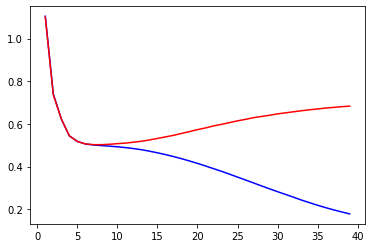

In [8]:
# Passamos tudo para numpy, para facilitar a manipulação
error_in = np.array(error_in)
error_out = np.array(error_out)

# Vamos ver como ficaram as curvas de erro em função do número de camadas
plt.plot(num_camadas, error_in, color='blue')
plt.plot(num_camadas, error_out, color='red')
plt.show()

O modelo aprendeu demais ou não atingiu o suficiente?

## O famoso trade-off Bias x Variance

O que é o Bias?
 - A diferença entre o valor-alvo e a previsão do modelo chama-se Bias. É fácil imaginar que, para ser capaz de prever com exatidão o futuro, primeiro é preciso entender bem o passado. Um preditor que não consegue mapear bem as características daquilo que já se observou claramente tende a não se sair bem para o futuro. O que aqui chamamos de “viés” são os desvios entre aquilo que se observou no passado e aquilo que se prevê pelo modelo proposto – em suma, é o quão bem o modelo está descrevendo os dados observados.

O que é Variância?
- é preciso calibrar o modelo de modo a capturar apenas o “essencial”, informações que realmente contribuem para uma boa previsão, em vez de captar por completo os padrões daquela amostra específica, pois ao fazer isso, informações inúteis (“ruído”) acabam sendo incorporadas ao mesmo tempo. Basicamente, ao forçar uma descrição muito fiel dos dados da amostra, acaba que se perde em capacidade de generalização, pois o futuro em geral não é uma extensão do passado. Variância diz respeito ao tamanho da variação entre os resultados obtidos pelo modelo para os dados de treino e os dados de teste.

Se temos um modelo que se ajusta mal aos dados do passado (“under-fitting”), o modelo já começa com pouca confiabilidade, pois não está sendo fiel às informações disponíveis; por outro lado, um ajustamento excessivo (“over-fitting”) acaba assumindo que o futuro irá repetir o passado, de modo que o modelo tende a fornecer uma péssima previsão para observações que sejam apenas um pouquinho fora daquele padrão dos dados passados.

Modelos que descrevem excessivamente bem os dados de uma amostra tendem a introduzir muita complexidade e volatilidade, de modo a prejudicar a capacidade de generalização.

Em uma linguagem simples, podemos dizer que um modelo de machine learning com alto viés “aprendeu pouco” e um modelo com muita variância “aprendeu demais”.

<img src="images/bias_variancia.png" style="width:700px" />
Fonte: 3Dimensões <br>


Através da figura 1, ficou claro que o objetivo aqui é obtermos um resultado com baixo viés e baixa variância. Com isso, dedicaremos nossos esforços para chegar a um resultado mais próximo possível desta realidade para garantirmos boa acurácia e precisão nas nossas previsões.

O segundo alvo na parte superior (baixo viés e alta variância) exemplifica bem os casos de overfitting ou “os modelos que aprenderam demais.” Perceba que o excesso de ajuste com os dados de treino neste caso não permitiu uma boa generalização com os dados novos calhando em uma baixa precisão.

O primeiro alvo da parte inferior (alto viés e baixa variância) demonstra os casos de underfitting ou “os modelos que aprenderam pouco.” Neste caso, houve um sub treinamento ao ponto do modelo não ser capaz de capturar a real relação entre os dados calhando também em uma previsão falha.

O segundo alvo da parte inferior da figura 1 (alto viés e alta variância) demonstra os casos de total inconsistência preditora de nosso modelo.


<img src="images/curve_bias_variance2.png" style="width:500px" />



## Erros de Previsão

Durante o processo de previsão, é possível que ocorram erros. Para evitar estas ocorrências e garantir um estudo otimizado, vamos ver como podem ser divididos os erros de previsão em um modelo de machine learning. Eles são:

- Erro irredutível
- Erro de variância
- Erro de viés

$erro = erro irredutível + viés^2 + variância$

O erro irredutível ou “ruído”, o próprio nome nos diz: não pode ser reduzido. Ele independe do algoritmo utilizado e pode ser causado, por exemplo, por preditores mal enquadrados ou incompletos.

O erro de alto viés geralmente é cometido por algoritmos lineares, que apresentam facilidade no aprendizado mas, são pouco flexíveis. Com isso, estes modelos apresentam um desempenho inferior quando aplicados em problemas mais complexos, por exemplo, regressão linear e regressão logística. Alguns exemplos de algoritmos de baixo viés são KNN, SVM, árvores de decisão.

## Comparando alguns modelos

<img src="images/rmse-models.png" style="width:800px" />
Fonte: http://regisely.com/blog/bias-variance/ <br>

No gráfico, foram estimados 9 modelos distintos:

- O primeiro modelo é a Regressão Linear, que possui alto viés e baixa variância, de modo que os erros do train e test set são altos mas semelhantes.

- O segundo modelo é o CART, de regressão com árvores. A ideia é estimar uma constante para diferentes níveis da variável previsora x. Esse modelo diminui um pouco os erros no train e test set, mas ainda assim, no nosso caso, o viés é alto.

- O terceiro modelo é o K-nearest neighbour com K=2. Este é um modelo não-paramétrico que calcula a distância do ponto a ser previsto em relação aos outros pontos da amostra, e utiliza a média dos 2 pontos mais próximos como previsor. Este modelo diminui consideravelmente os erros do train e test set, entretanto ele parece não realizar uma boa previsão nos valores extremos de x, visto que ao calcular a média dos vizinhos mais próximos a relação polinomial se perde nos extremos.

- O quarto modelo é o Support Vector Regression com kernel polinomial. Este modelo é o que faz o melhor trabalho como previsor, o que é de se esperar, visto que a função geradora dos dados é polinomial.

- O quinto modelo é uma Regressão Polinomial, que obviamente também faz um excelente trabalho de previsão, visto que a função que gerou os dados é um polinômio.

- O sexto modelo é um Thin Plate Spline, onde suavizamos a interpolação escolhendo o parâmetro de suavização através de validação cruzada (CV). Este modelo também consegue captar adequadamente a relação polinomial, embora ele tenha um erro no test set um pouco mais alto que os dois anteriores e o erro no train set um pouco mais baixo, indicando o início de um overfitting.

- O sétimo modelo é um Random Forest, que constrõe diversas árvores completas no estilo do modelo CART reordenando os dados através de um algoritmo de bootstrap, e então utiliza a média delas para diminuir a possibilidade de overfitting. A esta estratégia se dá o nome de Bagging. Entretanto, no nosso caso, o modelo ainda assim passa do ponto ideal, tendo um erro no test set um pouco maior do que os quatro modelos anteriores, apesar de ter o menor erro no train set. Isso indica que o modelo está incorrendo em overfitting.

- O oitavo modelo é o Gradient Boosting Trees, implementado através do pacote xgboost do R. Este é um dos modelos mais utilizados para previsão hoje em dia por sua flexibilidade e adaptabilidade a diferentes problemas. A ideia do modelo é estimar diversas árvores como no modelo CART, mas ao invés de estimar árvores completas e tirar a média como no Random Forest, o modelo começa estimando uma árvore simples, e então utiliza os pontos em que esta árvore não faz um bom trabalho de previsão para estimar outra árvore simples, e assim por diante. A esta estratégia se dá o nome de Boosting. A ideia é diminuir o viés, porém em geral este modelo terá uma variância maior do que Random Forest, podendo facilmente incorrer em overfitting, como acontece no nosso caso, em que o erro no train set é bem baixo, mas no test set é bem maior.

- O último modelo é a interpolação com Spline Cúbico, que passa exatamente por todos os pontos do train set, zerando o erro de previsão. Entretanto, ao avaliar a qualidade da previsão no test set obtemos um erro bem maior. Esse modelo está ocorrendo em um overfitting extremo, sendo complexo demais para gerar uma boa previsão.

Note que dependendo dos dados, os erros do train e test set podem ser completamente diferentes deste gráfico e nem sempre os modelos estarão posicionados exatamente nesta ordem de complexidade do gráfico. Um modelo CART pode ser mais complexo do que um Support Vector Regression, ou até mesmo um Random Forest pode ser mais complexo do que Gradient Boosting Trees, dependendo da parametrização e do conjunto de dados e previsores que se está utilizando. Para o nosso caso, em que o modelo correto é um polinômio, é natural que o Support Vector Regression com kernel polinomial e a Regressão Polinomial apresentem o melhor resultado, mas em geral, com um conjunto de dados mais complexo, com vários previsores, modelos como Random Forest e Gradient Boosting Trees podem ter resultados bem melhores no test set.

## Bibliografia
[Viés e Variância](https://www.bixtecnologia.com.br/como-entender-vies-e-variancia-em-modelos-preditivos/) <br>
[Viés e Variância](https://lamfo-unb.github.io/2017/04/29/Um-Olhar-Descontraido-Sobre-o-Dilema-Vies-Variancia/) <br>